In [1]:
%reload_ext autoreload
%autoreload 2

import sys

import numpy as np

sys.path.append("..")
from dm21cm.dm_params import DMParams

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file("../matplotlibrc")

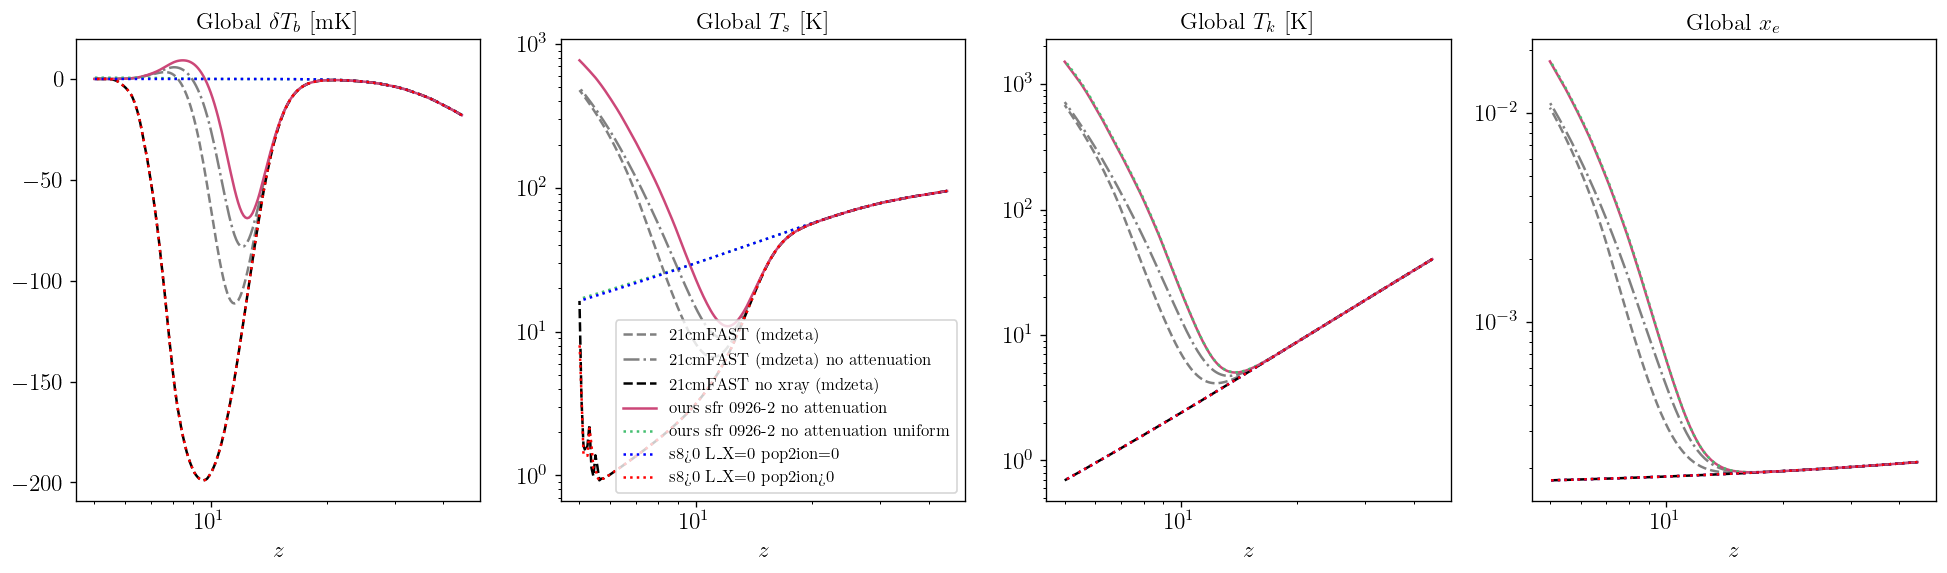

In [4]:
plot_options = {
    #'base' : dict(color='b', ls='-'),
    'base_mdz' : dict(color='gray', ls='--'),
    'base_mdz_noatten' : dict(color='gray', ls='-.'),
    #'base_mdz_noatten_2' : dict(color='b', ls='-.'),
    #'base_mdz_noatten_halfHe' : dict(color='r', ls='-.'),
    #'base_mdz_noatten_noHe' : dict(color='gray', ls=':'),
    'noxray_mdz' : dict(color='k', ls='--'),
    'ours_sfr0926-2_noatten' : dict(color=cms['plasma'](0.5)),
    'ours_unif' : dict(color=cms['viridis'](0.7), ls=':'),
    'test' : dict(color='b', ls=':'),
    'test2' : dict(color='r', ls=':'),
    # 'ours_sfr0926-2_noatten_coarsen10' : dict(color=cms['plasma'](0.8)),
    # 'ours_sfr0926-2_noatten_noHe' : dict(color=cms['plasma'](0.8)),
}

labels = {
    'T_b' : {
    },
    'T_k' : {
    },
    'T_s' : {
        'base_mdz' : '21cmFAST (mdzeta)',
        'base_mdz_noatten' : '21cmFAST (mdzeta) no attenuation',
        'base_mdz_noatten_noHe' : '21cmFAST (mdzeta) no attenuation no He',
        'base_mdz_noatten_halfHe' : '21cmFAST (mdzeta) no attenuation 1/2 He',
        'noxray_mdz' : '21cmFAST no xray (mdzeta)',
        'ours_sfr0926-2_noatten' : 'ours sfr 0926-2 no attenuation',
        'ours_unif' : 'ours sfr 0926-2 no attenuation uniform',
        'test' : 's8>0 L_X=0 pop2ion=0',
        'test2' : 's8>0 L_X=0 pop2ion>0',
        'ours_sfr0926-2_noatten_noHe' : 'ours sfr 0926-2 no attenuation no He',
        'ours_sfr0926-2_noatten_coarsen10' : 'ours sfr 0926-2 no attenuation coarsen=10',
    },
}

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for name in plot_options.keys():
    
    records = np.load(f'../data/run_info/xc_{name}_records.npy', allow_pickle=True).item()
    
    axs[0].plot(records['z'], records['T_b'], label=(labels['T_b'][name] if name in labels['T_b'].keys() else None), **plot_options[name])
    axs[1].plot(records['z'], records['T_s'], label=(labels['T_s'][name] if name in labels['T_s'].keys() else None), **plot_options[name])
    axs[2].plot(records['z'], records['T_k'], label=(labels['T_k'][name] if name in labels['T_k'].keys() else None), **plot_options[name])
    if name not in ['noxray', 'base']:
        axs[3].plot(records['z'], records['x_e'], **plot_options[name])
        #axs[4].plot(records['z'], records['1-x_H'], **plot_options[name])

axs[0].set(title=r'Global $\delta T_b$ [mK]', xlabel=r'$z$')
axs[1].set(title=r'Global $T_s$ [K]', xlabel=r'$z$')
axs[2].set(title=r'Global $T_k$ [K]', xlabel=r'$z$')
axs[3].set(title=r'Global $x_e$', xlabel=r'$z$')
#axs[4].set(title=r'Global $1-x_H$', xlabel=r'$z$')

axs[0].set(xscale='log')
axs[1].set(xscale='log', yscale='log')
axs[2].set(xscale='log', yscale='log')
axs[3].set(xscale='log', yscale='log')
#axs[4].set(xscale='log', yscale='log')

axs[1].legend(fontsize=10)
#fig.savefig('../outputs/plots/global_evolution.pdf')

In [7]:
name = 'ours_nobath'
records = np.load(f'../data/run_info/xc_{name}_records.npy', allow_pickle=True).item()

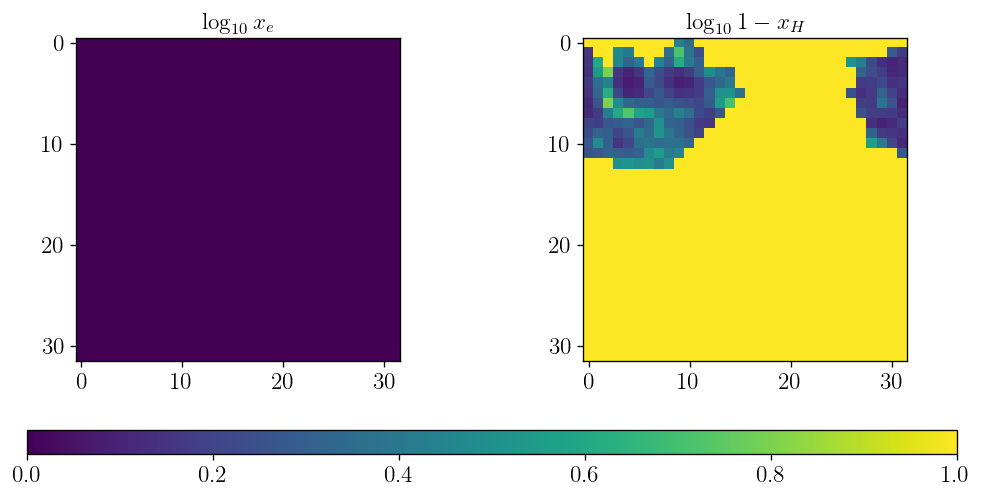

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
xe_slice = records['x_e_slice'][-30]
xH_slice = records['x_H_slice'][-30]
im = axs[0].imshow(xe_slice, vmin=0, vmax=1)
axs[1].imshow(1-xH_slice, vmin=0, vmax=1)
# r = np.log10(1-xH_slice) - np.log10(xe_slice)
# axs[2].imshow(np.where(xH_slice>0, r, np.nan))

axs[0].set(title=r'$\log_{10} x_e$')
axs[1].set(title=r'$\log_{10} 1-x_H$')

fig.colorbar(im, ax=axs, orientation='horizontal', aspect=40)
# axs[2].set(title=r'$\log_{10} (1-x_H) - \log_{10} x_e$')

/tmp/ipykernel_2395305/1397886710.py:5: RuntimeWarning: divide by zero encountered in log10
  im1 = axs[1].imshow(np.log10(xH_slice))
/tmp/ipykernel_2395305/1397886710.py:6: RuntimeWarning: divide by zero encountered in log10
  im2 = axs[2].imshow(np.where(xH_slice>0, np.log10(xH_slice) - np.log10(xe_slice), np.nan))


[Text(0.5, 1.0, '$\\log_{10} x_H - \\log_{10} x_e$')]

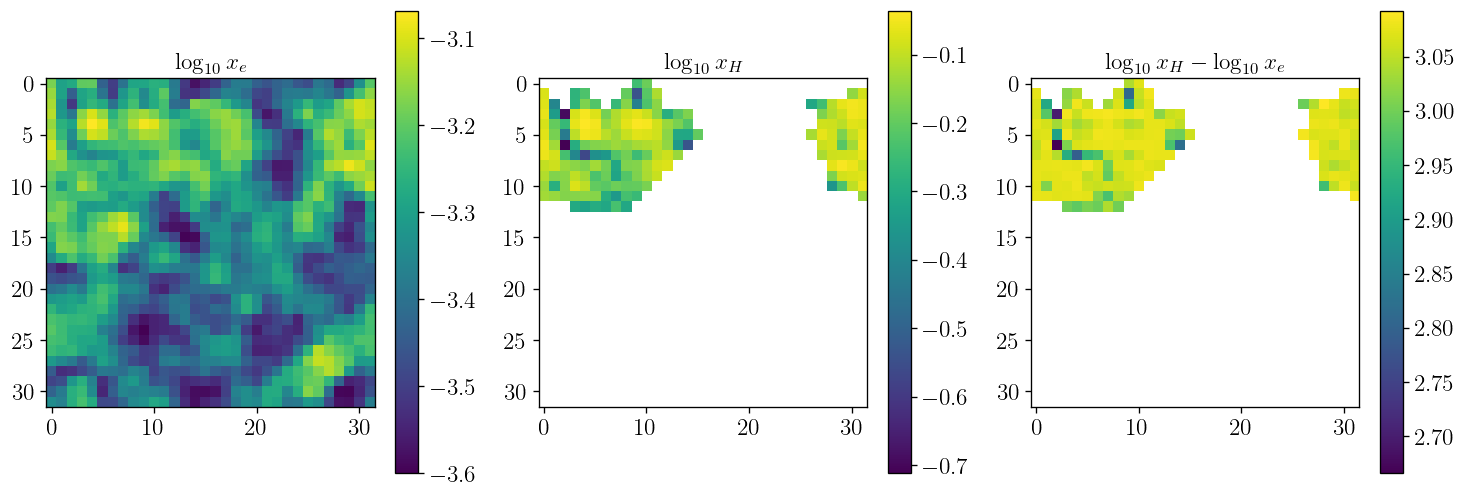

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
xe_slice = records['x_e_slice'][-30]
xH_slice = records['x_H_slice'][-30]
im0 = axs[0].imshow(np.log10(xe_slice))
im1 = axs[1].imshow(np.log10(xH_slice))
im2 = axs[2].imshow(np.where(xH_slice>0, np.log10(xH_slice) - np.log10(xe_slice), np.nan))
fig.colorbar(im0, ax=axs[0])
fig.colorbar(im1, ax=axs[1])
fig.colorbar(im2, ax=axs[2])

axs[0].set(title=r'$\log_{10} x_e$')
axs[1].set(title=r'$\log_{10} x_H$')
axs[2].set(title=r'$\log_{10} x_H - \log_{10} x_e$')